In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
from scipy.stats import ttest_1samp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

In [2]:
sns.set_palette("flare")

# 1. Exploratory Data Analysis

### 1.0 Raw Data

In [3]:
data = pd.read_csv('data/measurements.csv')

In [4]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
for i in data.columns:
    display(data[i].unique())

array(['28', '12', '11,2', '12,9', '18,5', '8,3', '7,8', '12,3', '4,9',
       '11,9', '12,4', '11,8', '24,7', '17,3', '33,4', '25,9', '25,3',
       '14,2', '17,9', '18,4', '18,3', '32,6', '19', '12,1', '20', '4,5',
       '11,7', '10,2', '5,4', '2', '16', '27,3', '10,6', '11,6', '13,1',
       '6,1', '153,5', '2,9', '2,1', '9,8', '6,8', '14', '13,9', '9,7',
       '24,8', '34,8', '5,2', '10,5', '13,2', '13', '12,2', '12,5',
       '15,7', '6,4', '5,3', '26,2', '18,8', '22,9', '162,7', '16,6',
       '15,9', '5,1', '22,4', '31,1', '16,1', '4,2', '17,4', '23,5', '7',
       '20,1', '20,8', '1,7', '35,9', '36,9', '16,8', '9,9', '36,6',
       '44,9', '21,6', '39,4', '26,6', '53,2', '18,9', '43,5', '16,4',
       '21,1', '22,7', '44,4', '35,8', '40,6', '14,1', '58,7', '16,2',
       '31,8', '51,6', '38,6', '81,2', '130,3', '67,2', '43,7', '56,1',
       '39', '38,5', '28,2', '19,6', '22,2', '13,6', '12,6', '8,7', '7,9',
       '2,4', '18,1', '1,3', '13,4', '12,8', '29', '31,4', '27,1', '

array(['5', '4,2', '5,5', '3,9', '4,5', '6,4', '4,4', '5,3', '5,6', '4,6',
       '5,9', '5,1', '4,7', '4,9', '5,7', '4,1', '5,8', '4,8', '4,3',
       '5,2', '7,4', '6,5', '4', '3,3', '9,9', '6,1', '6,2', '7,9',
       '12,2', '5,4', '3,6', '6,9', '8,7', '6,3', '6', '10,8', '8,1',
       '7,1', '3,8', '9', '3,7', '11,5', '6,6'], dtype=object)

array([26, 30, 38, 36, 46, 50, 43, 40, 42, 59, 58, 24, 32, 39, 37, 62, 57,
       21, 28, 29, 35, 51, 23, 55, 44, 25, 63, 61, 82, 52, 18, 41, 20, 56,
       45, 22, 60, 33, 34, 71, 75, 66, 27, 49, 14, 80, 53, 47, 73, 69, 85,
       67, 54, 31, 48, 16, 88, 65, 90, 87], dtype=int64)

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

array([12, 13, 15, 14, 10, 11,  6,  4,  9,  0,  5,  3,  8,  1,  2,  7, -3,
       17, 18, -5, 16, 19, 21, 20, 25, 23, 27, 24, 26, 22, 30, 31, 28],
      dtype=int64)

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

array(['E10', 'SP98'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

array(['E10', nan, 'SP98'], dtype=object)

In [7]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


### 1.1. Data Wrangling

##### 1.1.1 

* Handling missing or null values.
* Dealing with duplicates and erroneous data.
* Transforming data types

1.1.1.1 Distance

In [8]:
data['distance'] = data['distance'].str.replace(',', '.')

In [9]:
data['distance'] = data['distance'].astype(float)

1.1.1.2 Consume

In [10]:
data['consume'] = data['consume'].str.replace(',', '.')
data['consume'] = data['consume'].astype(float)

1.1.1.3 Temp_inside

In [11]:
data['temp_inside'] = data['temp_inside'].str.replace(',', '.')
data['temp_inside'] = data['temp_inside'].astype(float)

In [12]:
data['temp_inside'] = data['temp_inside'].fillna(round(data['temp_inside'].mean()))

1.1.1.4 Specials

In [13]:
data['specials'] = data['specials'].str.replace('AC', 'ac')
data['specials'] = data['specials'].str.replace('Sun', 'sun')
data['specials'] = data['specials'].str.replace('sun ac', 'ac sun')

In [14]:
data['specials'] = data['specials'].fillna('none')

1.1.1.5 Refill_liters

In [15]:
data = data.rename(columns={'refill liters':'refill_liters'})

In [16]:
data['refill_liters'] = data['refill_liters'].str.replace(',', '.')
data['refill_liters'] = data['refill_liters'].astype(float)

In [17]:
data['refill_liters'] = data['refill_liters'].fillna(0)

1.1.1.6 Refill_gas

In [18]:
data = data.rename(columns={'refill gas':'refill_gas', 'AC': 'ac'})

In [19]:
data['refill_gas'] = data['refill_gas'].fillna(0)

##### 1.1.2 

* Aggregating data and reshaping
* Creating new features

In [20]:
for i in data.columns:
    display(data[i].unique())

array([ 28. ,  12. ,  11.2,  12.9,  18.5,   8.3,   7.8,  12.3,   4.9,
        11.9,  12.4,  11.8,  24.7,  17.3,  33.4,  25.9,  25.3,  14.2,
        17.9,  18.4,  18.3,  32.6,  19. ,  12.1,  20. ,   4.5,  11.7,
        10.2,   5.4,   2. ,  16. ,  27.3,  10.6,  11.6,  13.1,   6.1,
       153.5,   2.9,   2.1,   9.8,   6.8,  14. ,  13.9,   9.7,  24.8,
        34.8,   5.2,  10.5,  13.2,  13. ,  12.2,  12.5,  15.7,   6.4,
         5.3,  26.2,  18.8,  22.9, 162.7,  16.6,  15.9,   5.1,  22.4,
        31.1,  16.1,   4.2,  17.4,  23.5,   7. ,  20.1,  20.8,   1.7,
        35.9,  36.9,  16.8,   9.9,  36.6,  44.9,  21.6,  39.4,  26.6,
        53.2,  18.9,  43.5,  16.4,  21.1,  22.7,  44.4,  35.8,  40.6,
        14.1,  58.7,  16.2,  31.8,  51.6,  38.6,  81.2, 130.3,  67.2,
        43.7,  56.1,  39. ,  38.5,  28.2,  19.6,  22.2,  13.6,  12.6,
         8.7,   7.9,   2.4,  18.1,   1.3,  13.4,  12.8,  29. ,  31.4,
        27.1,  25.2,  14.3,  16.9,   9.2,  31.5,  24.9,  17. ,   7.4,
        25.7,  24.5,

array([ 5. ,  4.2,  5.5,  3.9,  4.5,  6.4,  4.4,  5.3,  5.6,  4.6,  5.9,
        5.1,  4.7,  4.9,  5.7,  4.1,  5.8,  4.8,  4.3,  5.2,  7.4,  6.5,
        4. ,  3.3,  9.9,  6.1,  6.2,  7.9, 12.2,  5.4,  3.6,  6.9,  8.7,
        6.3,  6. , 10.8,  8.1,  7.1,  3.8,  9. ,  3.7, 11.5,  6.6])

array([26, 30, 38, 36, 46, 50, 43, 40, 42, 59, 58, 24, 32, 39, 37, 62, 57,
       21, 28, 29, 35, 51, 23, 55, 44, 25, 63, 61, 82, 52, 18, 41, 20, 56,
       45, 22, 60, 33, 34, 71, 75, 66, 27, 49, 14, 80, 53, 47, 73, 69, 85,
       67, 54, 31, 48, 16, 88, 65, 90, 87], dtype=int64)

array([21.5, 22.5, 20. , 22. , 21. , 20.5, 23. , 23.5, 25. , 24. , 19. ,
       24.5, 25.5])

array([12, 13, 15, 14, 10, 11,  6,  4,  9,  0,  5,  3,  8,  1,  2,  7, -3,
       17, 18, -5, 16, 19, 21, 20, 25, 23, 27, 24, 26, 22, 30, 31, 28],
      dtype=int64)

array(['none', 'ac rain', 'ac', 'rain', 'snow', 'ac snow',
       'half rain half sun', 'sun', 'ac sun'], dtype=object)

array(['E10', 'SP98'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([45. ,  0. , 37.6, 37.7, 38. , 38.3, 10. , 39. , 41. , 37. , 37.2])

array(['E10', 0, 'SP98'], dtype=object)

> I´ll complete/add columns with column specials and then delete it.

In [21]:
data['ac'] = np.where(data['specials'] == r'(ac|ac[\w])', 1, data['ac'])

In [22]:
condition = data['specials'].str.contains(r'(ac|ac[\w])', regex=True)

data.loc[condition, 'ac'] = 1

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\991639220.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condition = data['specials'].str.contains(r'(ac|ac[\w])', regex=True)


In [23]:
condition = data['specials'].str.contains(r'(rain|ac rain|half rain half sun)', regex=True)

data.loc[condition, 'rain'] = 1

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\1604759664.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condition = data['specials'].str.contains(r'(rain|ac rain|half rain half sun)', regex=True)


In [24]:
condition = data['specials'].str.contains(r'(sun|ac sun|half rain half sun)', regex=True)

data.loc[condition, 'sun'] = 1

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\3014708592.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condition = data['specials'].str.contains(r'(sun|ac sun|half rain half sun)', regex=True)


In [25]:
condition = data['specials'].str.contains(r'(snow|ac snow)', regex=True)

data.loc[condition, 'snow'] = 1

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\2356729431.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  condition = data['specials'].str.contains(r'(snow|ac snow)', regex=True)


In [26]:
data['snow'] = data['snow'].fillna(0)
data['snow'] = data['snow'].astype(int)

In [27]:
data[data['specials']=='snow']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,snow
118,12.4,4.6,38,23.0,1,snow,SP98,0,1,0,0.0,0,1
124,11.8,4.6,38,23.0,0,snow,SP98,0,1,0,0.0,0,1
125,12.2,6.3,57,23.0,0,snow,SP98,0,1,0,0.0,0,1


> I´ll delete the refill columns as they don´t give much information.

In [28]:
data.drop(['specials', 'refill_liters', 'refill_gas'], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\4148126127.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


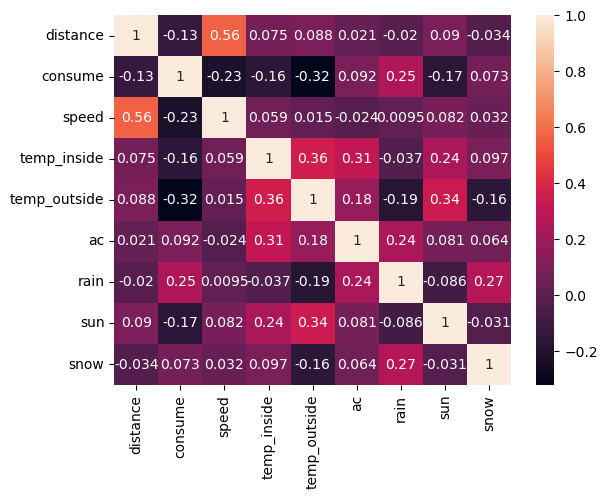

In [29]:
correlation = data.corr()
sns.heatmap(correlation, annot=True)
plt.show()

> There´s no much correlation with the target. There´s no multicolinearity.

##### 1.1.3 Handling outliers

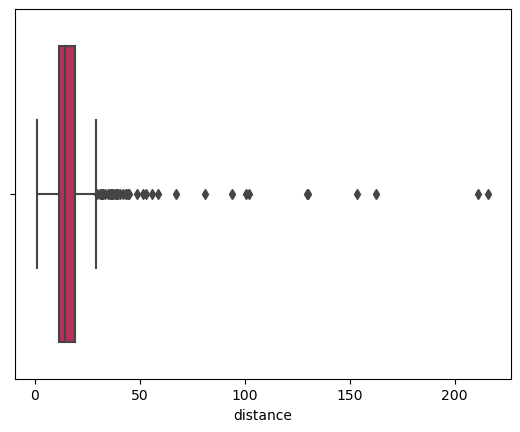

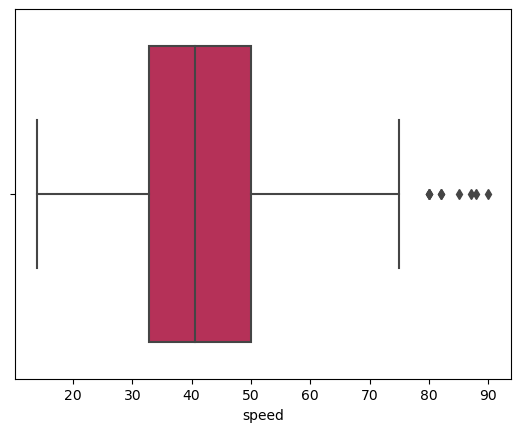

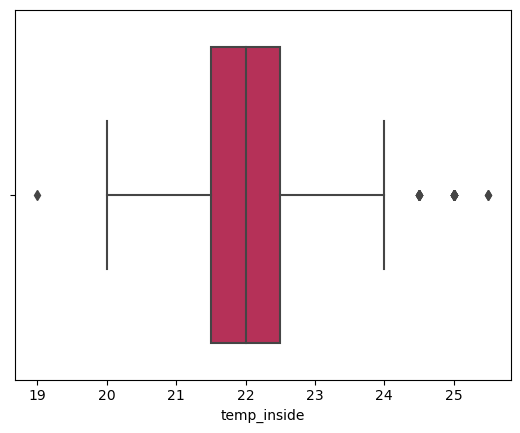

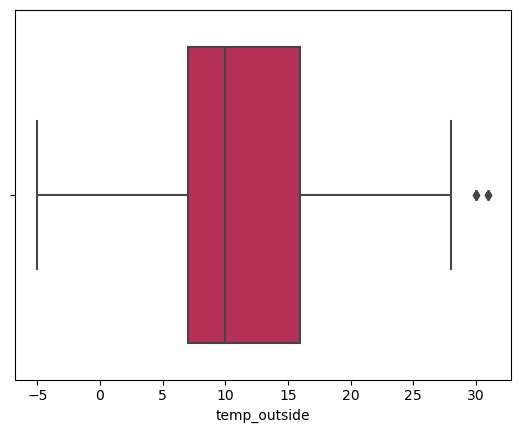

In [30]:
check_outliers = ['distance', 'speed', 'temp_inside', 'temp_outside']
for i in check_outliers:
    sns.boxplot(x = i, palette = 'rocket', data=data)
    plt.show()

In [31]:
data = data[data['distance']<=60]

In [32]:
data = data[(data['temp_inside']>=20) & (data['temp_inside']<=24)]

In [33]:
data.shape

(355, 10)

In [34]:
data.to_csv('data_cleaned.csv')

# 2. Visualization

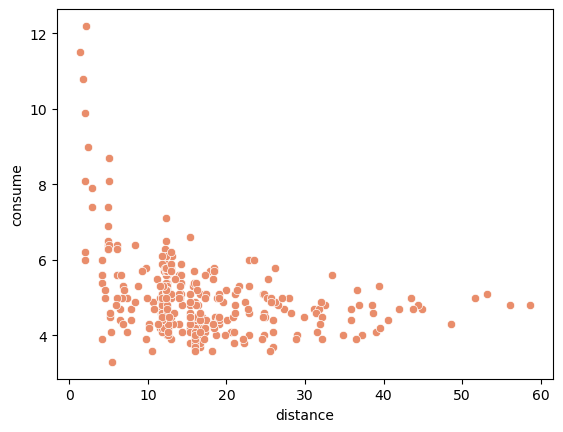

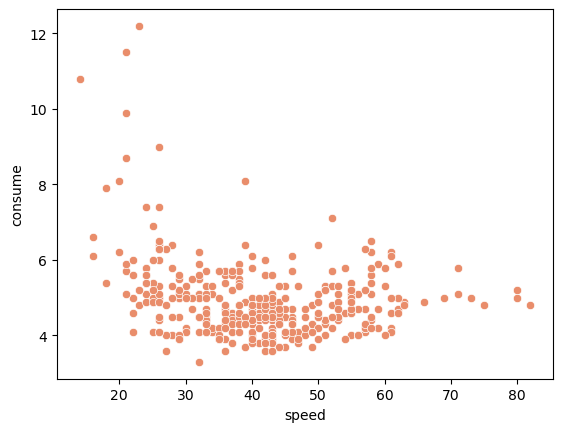

In [35]:
visualize_scatter =['distance', 'speed']
for i in visualize_scatter:
    sns.scatterplot(x=data[i], y=data['consume'])
    plt.show()

> Consumption doesn´t vary much with the speed or distance.

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\2591867775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[i], y=data['consume'], palette='Set2', ci=None)


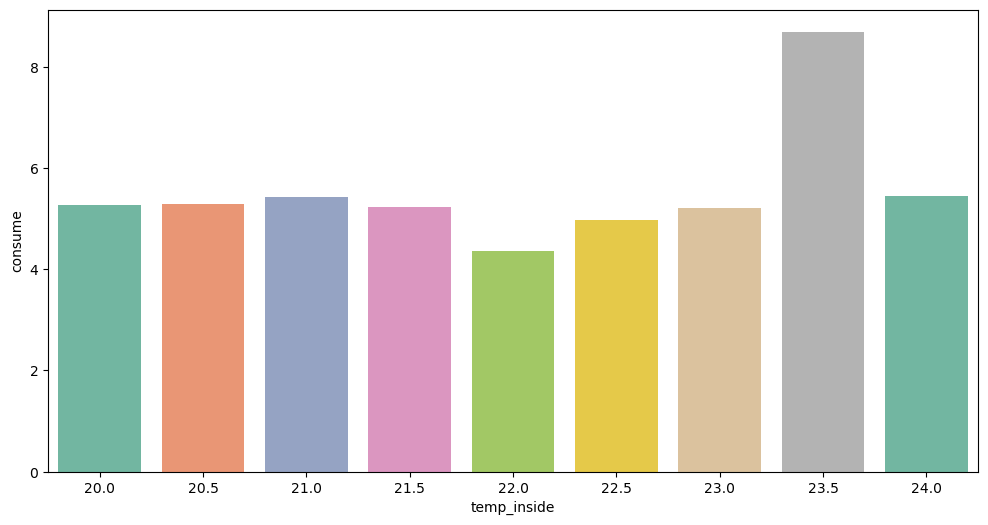

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\2591867775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[i], y=data['consume'], palette='Set2', ci=None)


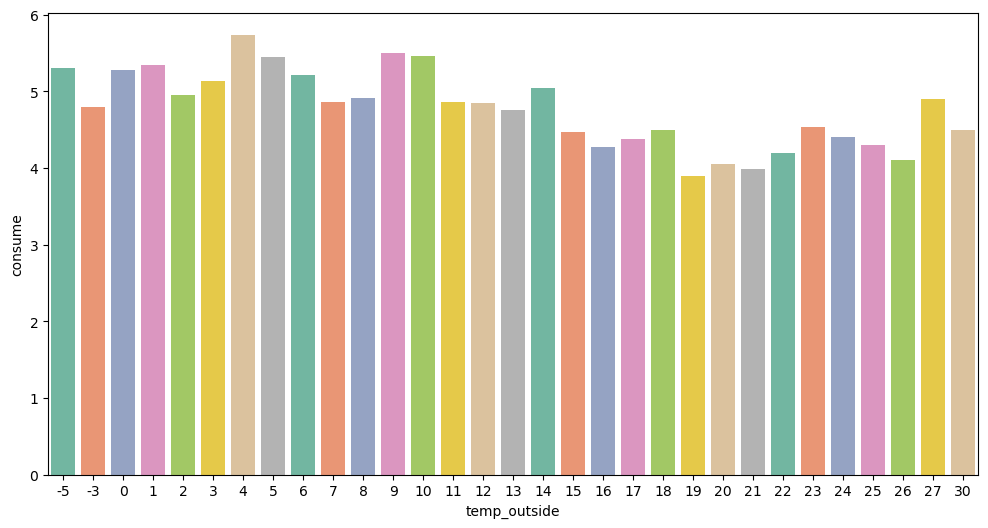

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\2591867775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[i], y=data['consume'], palette='Set2', ci=None)


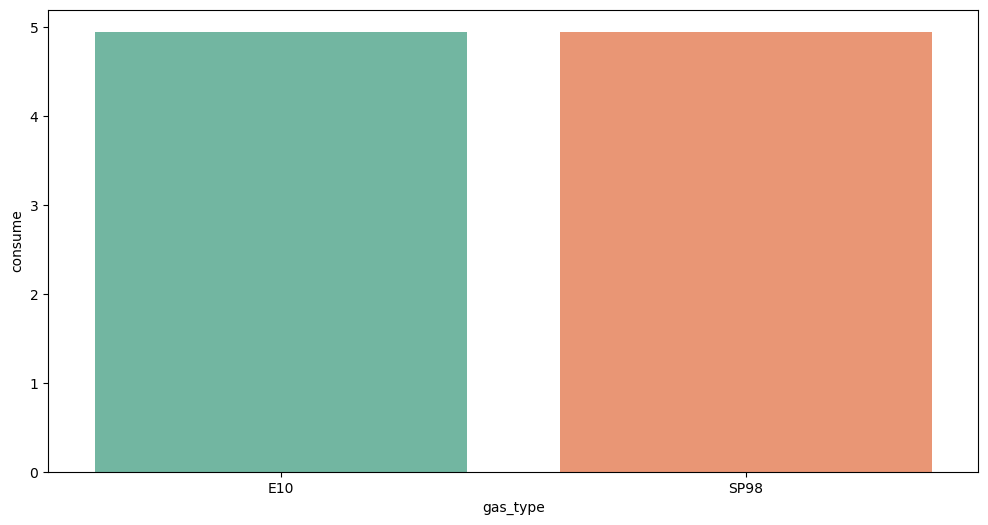

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\2591867775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[i], y=data['consume'], palette='Set2', ci=None)


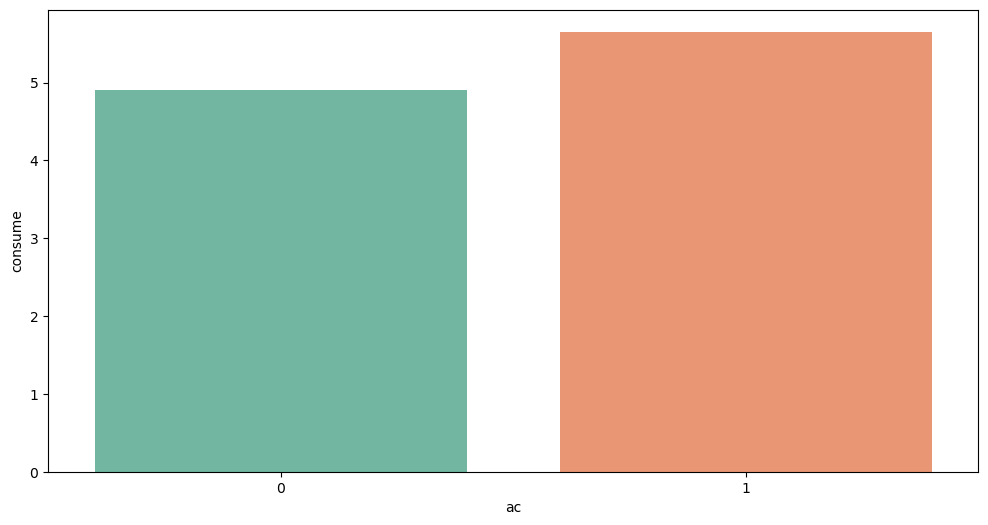

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\2591867775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[i], y=data['consume'], palette='Set2', ci=None)


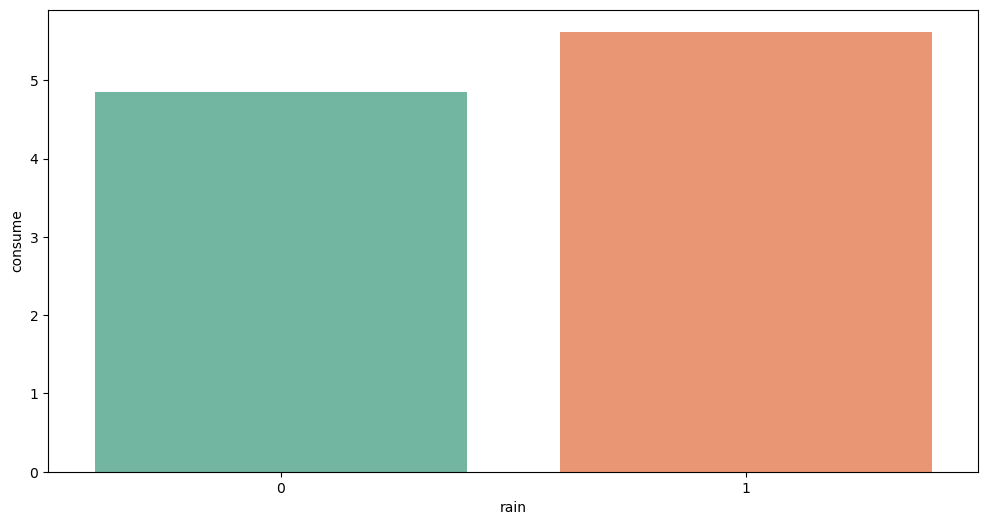

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\2591867775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[i], y=data['consume'], palette='Set2', ci=None)


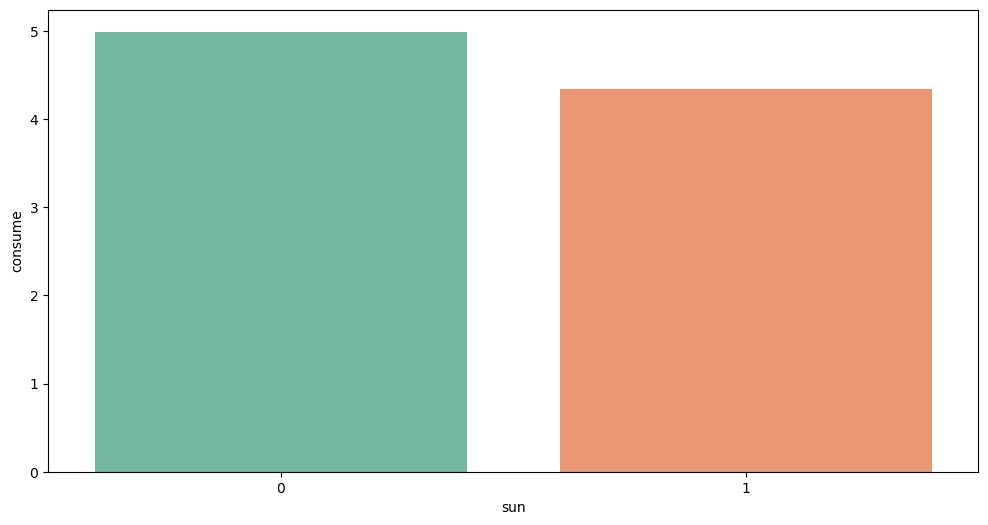

C:\Users\PC\AppData\Local\Temp\ipykernel_10792\2591867775.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[i], y=data['consume'], palette='Set2', ci=None)


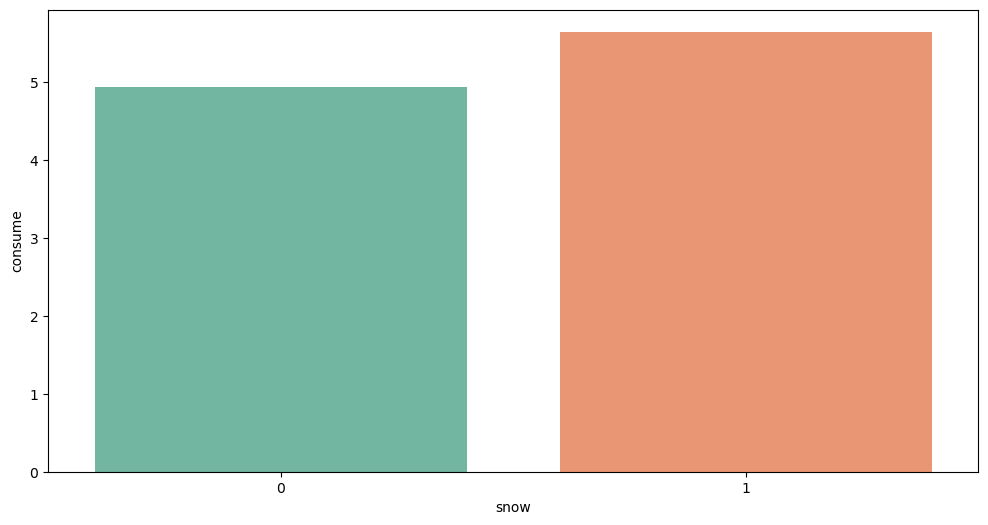

In [36]:
visualize_barplot = ['temp_inside', 'temp_outside', 'gas_type', 'ac', 'rain', 'sun', 'snow']
for i in visualize_barplot:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data[i], y=data['consume'], palette='Set2', ci=None)
    plt.show()

> When the weather is cold (rain or snow), there is usually higher consumption compared to sunny weather. The type of gas does not affect consumption. It's noteworthy that when the indoor temperature is 23.5 degrees Celsius, consumption tends to be higher than at other temperatures.

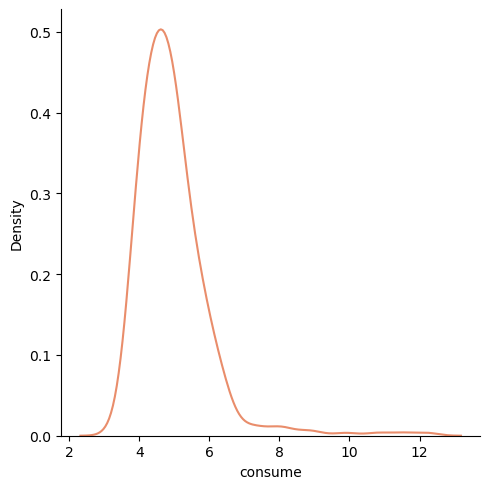

In [37]:
sns.displot(data = data, x = "consume", kind="kde")

> Consume distribution is skewed to the left and the most common consume is 5.

# 3. Predictions

### 3.1 Hypothesis

In [39]:
# Null hypothesis or H0: mean consumption = 5
# Alternative hyp or H1: mean consumption <> 5

stat, pval = ttest_1samp(data['consume'], 5)

print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

stat is   -0.9398454957284045
pvalue for the two-tailed test is  0.34793766331556986


We cannot reject the null hypothesis, so we have evidence the mean consumption in the population is 5.

### 3.2 Linear Regression

In [40]:
y = data['consume']
X = data.drop(['consume'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')
X_train_num = X_train[['ac', 'rain', 'sun', 'snow']]
X_train_scale = X_train[['distance', 'speed', 'temp_inside', 'temp_outside']]
X_test_num = X_test[['ac', 'rain', 'sun', 'snow']]
X_test_scale = X_test[['distance', 'speed', 'temp_inside', 'temp_outside']]

In [41]:
X_trans = MinMaxScaler().fit(X_train_scale)
X_train_nor = X_trans.transform(X_train_scale)

X_train_scale = pd.DataFrame(X_train_nor, columns=X_train_scale.columns)

X_test_nor = X_trans.transform(X_test_scale)
X_test_scale = pd.DataFrame(X_test_nor, columns = X_train_scale.columns)

In [42]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded = encoder.transform(X_train_cat).toarray()
X_train_cat = pd.DataFrame(encoded)
encoded = encoder.transform(X_test_cat).toarray()
X_test_cat = pd.DataFrame(encoded)

In [43]:
X_train_num = X_train_num.reset_index(drop=True)
X_test_num = X_test_num.reset_index(drop=True)

In [44]:
X_train = pd.concat([X_train_num, X_train_scale, X_train_cat],axis=1)
X_test = pd.concat([X_test_num, X_test_scale, X_test_cat],axis=1)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [45]:
regr = DecisionTreeRegressor(max_depth=5,
                             criterion = 'squared_error'
                             min_samples_split=9,
                             min_samples_leaf = 2,
                             max_features = None)
model = regr.fit(X_train, y_train)
print("test data R2 score was: ",regr.score(X_test, y_test))
print("train data R2 score was: ",regr.score(X_train, y_train))

test data R2 score was:  0.4486549881919665
train data R2 score was:  0.7100407067139045
